In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from utils import mnist_reader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools


In [2]:

def show_image(pixels, label, color ="gray"):
    pixels = pixels.reshape((28,28))
    plt.imshow(pixels, cmap=color)
    plt.show()
    

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [3]:

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

class_names = np.unique(y_test)


In [4]:
print "X_train = %d \n y_train = %d"%(len(X_train), len(y_train))
print "X_test = %d \n y_test = %d"%(len(X_test), len(y_test))

X_train = 60000 
 y_train = 60000
X_test = 10000 
 y_test = 10000


In [5]:
X_train.shape

(60000L, 784L)

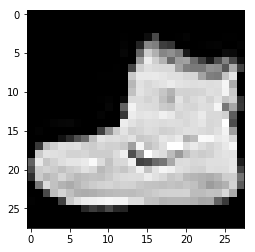

In [6]:
show_image(X_train[0], y_test[0])

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

clf = DummyClassifier(strategy='prior',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


## Greatshearch ##
El siguiente link tiene un ejemplo de greatshearch para svc. Se definen distintos parametros y se printea cual de las combinaciones de ellos es la mas optima. Es un procesos costoso que habria que hacer algun dia D:

http://scikit-learn.org/0.18/auto_examples/model_selection/grid_search_digits.html

### Entrenamos la maquina SVM ###
from sklearn import svm

svc = svm.SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_train, y_train)  


### Clasificamos SVM ###
y_predict = svc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, y_predict))

### Entrenamos la maquina RandomForest ###
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # Creando el modelo
rf.fit(X_train, y_train) # Ajustando el modelo


### Clasificamos RandomForest ###
predict = rf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, predict, class_names))

# MEDIMOS PREDICCION DE SVC
from sklearn.metrics import f1_score

f1_score(y_test, y_predict, average='macro')  
f1_score(y_test, y_predict, average='micro')  
f1_score(y_test, y_predict, average='weighted')  
f1_score(y_test, y_predict, average=None)

from sklearn.neural_network import MLPClassifier
from timeit import default_timer as timer
redNeuronal = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,250,500,1000))
#La cantidad de iteraciones = 1000
#Capas ocultas = [10,25,50,100]

comienzo = timer()
redNeuronal.fit(X_train, y_train)
fin = timer() - comienzo
print("Tiempo red neuronal:",fin, " segundos")

indicador = redNeuronal.score(X_test, y_test)
if indicador > 0.5 and indicador < 1:
    print("Entrenado")
else:
    if indicador == 1.0:
        print("Sobreentrenado")
    else:
        print("Falta entrenamiento")
print (indicador)

predict = redNeuronal.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix red neuronal, sin normalization')
plt.show()

print(classification_report(y_test, predict, class_names))

In [7]:
from timeit import default_timer as timer
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer, MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

ERROR (theano.sandbox.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "C:\Users\fdman\Anaconda3\envs\py27\lib\site-packages\theano\sandbox\gpuarray\__init__.py", line 95, in <module>
    init_dev(config.device)
  File "C:\Users\fdman\Anaconda3\envs\py27\lib\site-packages\theano\sandbox\gpuarray\__init__.py", line 46, in init_dev
    "Make sure Theano and libgpuarray/pygpu "
RuntimeError: ('Wrong major API version for gpuarray:', 1, 'Make sure Theano and libgpuarray/pygpu are in sync.')


In [8]:
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

C:\Users\fdman\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
arquitectura1 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
               (Conv2DLayer, {'num_filters':5, 'filter_size': 10, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
             (Conv2DLayer, {'num_filters':5, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 10}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#parametros 1565 score=0.02

arquitectura2 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
               (Conv2DLayer, {'num_filters':1, 'filter_size': 10, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
             (Conv2DLayer, {'num_filters':1, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 10}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#287 parametros score = 0.02
arquitectura3 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':5, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':5, 'filter_size': 2, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':5, 'filter_size': 1, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 10}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]## Neural Network with 7505 learnable parameters, score 0.02
arquitectura4 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':10, 'filter_size': 10, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 2, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (DenseLayer, {'num_units': 100}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#Network with 16550 learnable parameters, score=0.1, tiempo
arquitectura5 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#0.32 score, tiempo 871.16 sg, parametros 170 mil

arquitectura6 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': 10, 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (Conv2DLayer, {'num_filters':10, 'filter_size': 2, 'W': lasagne.init.GlorotUniform()}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]#0.1 score, tiempo cortado, parametros 39130 

arquitectura7 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]# empezo con score 0.28, tiempo sg, parametros 
arquitectura8 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':100, 'filter_size': (2,2), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]# score: 0.10, tiempo sg, parametros 185110
arquitectura9 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                (Conv2DLayer, {'num_filters':100, 'filter_size': (4,4), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (Conv2DLayer, {'num_filters':100, 'filter_size': (5,5), 'W': lasagne.init.GlorotUniform()}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ]# score 0.1, tiempo sg 11992, parametros 460210  
arquitectura10 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':1000, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
]#Score 0.57     tiempo 14000sg  parametros 1700010
arquitectura11 = [
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
                (Conv2DLayer, {'num_filters':100, 'filter_size': (3,3), 'W': lasagne.init.GlorotUniform()}),
                 (Conv2DLayer, {'num_filters':100, 'filter_size': (2,2), 'W': lasagne.init.GlorotUniform()}),
                    (Conv2DLayer, {'num_filters':100, 'filter_size': (5,5), 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DropoutLayer, {'p': 0.25}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),
]#Score  0.1    tiempo mucho  parametros 391210 

arquitecturaLeandro = [
    (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
               
               (Conv2DLayer, {'num_filters':32, 'filter_size': 3, 'W': lasagne.init.GlorotUniform(), 
                             'nonlinearity': lasagne.nonlinearities.rectify}),
               (MaxPool2DLayer, {'pool_size': 2}),
               (DropoutLayer, {'p': 0.25}),
               
               (Conv2DLayer, {'num_filters':64, 'filter_size': 3, 'W': lasagne.init.GlorotUniform(),
                             'nonlinearity': lasagne.nonlinearities.rectify}),
               (MaxPool2DLayer, {'pool_size': 2}),
               (DropoutLayer, {'p': 0.25}),
               
               (Conv2DLayer, {'num_filters':128, 'filter_size': 3, 'W': lasagne.init.GlorotUniform(),
                             'nonlinearity': lasagne.nonlinearities.rectify}),
               (MaxPool2DLayer, {'pool_size': 2}),
               (DropoutLayer, {'p': 0.4}),
               
               #(FlattenLayer,{}),
               (DenseLayer, {'num_units': 128, 'nonlinearity': lasagne.nonlinearities.rectify}),
               (DropoutLayer, {'p': 0.3}),
               (DenseLayer, {'num_units': 128, 'nonlinearity': lasagne.nonlinearities.rectify}),
               
               (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax})]

In [10]:
class AdjustVariable(object):

    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None
    
    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)
        epoch = train_history[-1]['epoch']
        new_value = np.float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)

In [11]:
def create_net(max_epochs):
    return NeuralNet(
        layers= arquitecturaLeandro,
        update=nesterov_momentum,
        update_learning_rate=0.01,
        update_momentum=0.9,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        batch_iterator_train=BatchIterator(batch_size=128),
        on_epoch_finished=[
            AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
            AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        ],
        max_epochs=max_epochs,
        verbose=1)

(60000L, 784L)
(60000L,)
(60000L, 1L, 28L, 28L)
(28L, 28L)


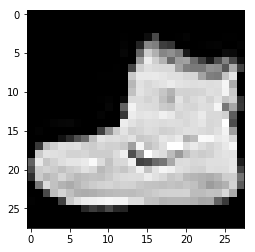

In [12]:

from sklearn.cross_validation import train_test_split


print (X_train.shape)
print (y_train.shape)
x = X_train.reshape(60000, 1, 28, 28)
print(x.shape)
print(x[0,0].shape)
show_image(x[0,0],'hola')

# RED NEURONAL CONVULCIONADA

In [13]:
net = None
epoch = 5
net = create_net(epoch)
comienzo = timer()
net.fit(x, y_train)
fin = timer() - comienzo
print("Tiempo red neuronal convulcionada:",fin, " segundos con epoch:",epoch)



# Neural Network with 126986 learnable parameters

## Layer information

  #  name        size
---  ----------  --------
  0  input0      1x28x28
  1  conv2d1     32x26x26
  2  maxpool2d2  32x13x13
  3  dropout3    32x13x13
  4  conv2d4     64x11x11
  5  maxpool2d5  64x5x5
  6  dropout6    64x5x5
  7  conv2d7     128x3x3
  8  maxpool2d8  128x1x1
  9  dropout9    128x1x1
 10  dense10     128
 11  dropout11   128
 12  dense12     128
 13  dense13     10



AttributeError: 'float' object has no attribute 'set_value'

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [ ]:
X_test.shape
XTEST = X_test.reshape(10000,1,28,28)
XTEST.shape
print(y_test.shape)

In [ ]:
print (classification_report(y_test, net.predict(XTEST)))


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
%matplotlib inline
visualize.plot_loss(net)

import pickle
with open('clasificadorNET.pickle', 'wb') as f:
        pickle.dump(net, f, -1)

net2 = None
with open('clasificadorNET.pickle', 'rb') as f:
       net2 = pickle.load(f)

print(y_test[0])
print (y_test[1])
print (y_test[2])

net2.predict(x)